In [103]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
##nltk.download('punkt')
import sent2vec
import numpy as np

model = sent2vec.Sent2vecModel()
#model.load_model('/home/rich/Downloads/model.bin')
model.load_model('model.bin')
#embs = model.embed_sentences(["first sentence .", "another sentence"])
embW, vocab = model.get_unigram_embeddings()
#print(len(vocab))
#print(vocab["neuron"])


f=open("/home/rich/Nikola/clean.test.title.txt","r+") 
text =f.read()
tokS=sent_tokenize(text)
embS = model.embed_sentences(tokS)

#embW = model.embed_unigrams(['dog', 'cat'])
#print(tok)
#print(embs)

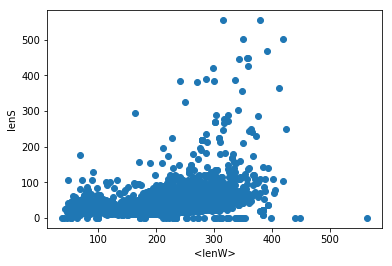

In [162]:
#vocab = model.get_vocabulary() 
#embW, vocab = model.get_unigram_embeddings()
#print(len(embW[7]))
import numpy as np
import matplotlib.pyplot as plt
#print(np.linalg.norm(embS[1]))

lenS=[0]*len(tokS)
lenS2=[0]*len(tokS)
lenW=[0]*len(tokS);
for i in range(len(tokS)):
    lenS[i]=np.linalg.norm(embS[i])**2# norm embedded sentences
    tokWs=word_tokenize(tokS[i])
    sentW=[0]*len(tokWs)
    sentS=[0]*len(embS[1])
    for j in range(len(tokWs)):
        hh=model.embed_sentences(sent_tokenize(tokWs[j]))
        sentS=sentS+hh
        sentW[j]=np.linalg.norm(hh)**2
    lenW[i]=np.mean(sentW) # mean norm embedded words
    lenS2[i]=np.linalg.norm(sentS/len(tokWs))**2 # norm mean sent vect
plt.scatter(lenW, lenS)
plt.xlabel('<lenW>')
plt.ylabel('lenS')
plt.show()

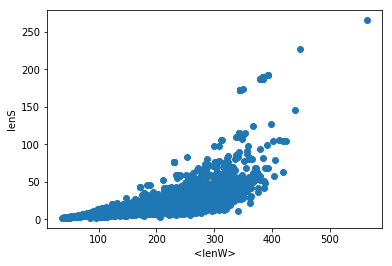

In [163]:
plt.scatter(lenW, lenS2)
plt.xlabel('<lenW>')
plt.ylabel('lenS')
plt.show()

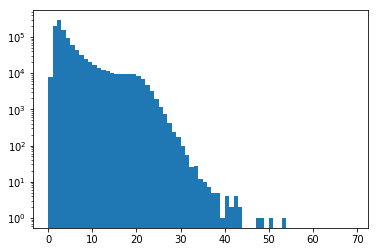

In [148]:
l=[0]*len(embW)
for i in range(len(embW)):
    l[i]=np.linalg.norm(embW[i])
plt.yscale('log')
plt.hist(l,bins=range(70))
plt.show()

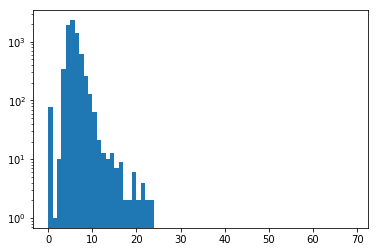

In [149]:
l=[0]*len(embS)
for i in range(len(embS)):
    l[i]=np.linalg.norm(embS[i])
plt.yscale('log')
plt.hist(l,bins=range(70))
plt.show()

In [151]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)

In [154]:
plt.scatter(embedding)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'